多项式（Polynomial）是代数学中的基础概念，是由称为未知数的变量和称为系数的常量通过有限次加法、加减法、乘法以及自然数幂次的乘方运算得到的代数表达式。

In [1]:
# 加载示例数据
x = [4, 8, 12, 25, 32, 43, 58, 63, 69, 79]
y = [20, 33, 50, 56, 42, 31, 33, 46, 65, 75]

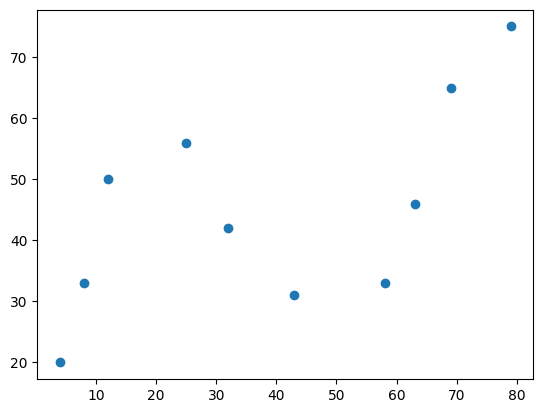

In [2]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.scatter(x, y)

2 次多项式拟合

In [3]:
# p: 多项式系数
def func(p, x):
    # 根据公式，定义 2 次多项式函数
    w0, w1, w2 = p
    f = w0 + w1 * x + w2 * x * x
    return f


def err_func(p, x, y):
    # 残差函数（观测值与拟合值之间的差距）
    ret = func(p, x) - y
    return ret

In [4]:
# 使用最小二乘法求解最优参数 
# scipy.optimize.leastsq() 
import numpy as np
from scipy.optimize import leastsq

p_init = np.random.randn(3)  # 生成 3 个随机数
# 使用 Scipy 提供的最小二乘法函数得到最佳拟合参数
parameters = leastsq(err_func, p_init, args=(np.array(x), np.array(y)))

print("Fitting Parameters: ", parameters[0])

Fitting Parameters:  [ 3.76893125e+01 -2.60474195e-01  8.00078133e-03]


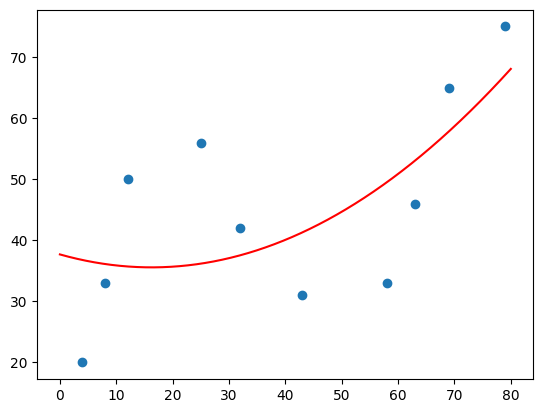

In [5]:
# 绘制拟合后的图像

# 绘制拟合图像时需要的临时点
x_temp = np.linspace(0, 80, 10000)

# 绘制拟合函数曲线
plt.plot(x_temp, func(parameters[0], x_temp), "r")

# 绘制原数据点
plt.scatter(x, y)